# Introduction
The bike has 20 gears but the power has a linear relationship to the speed. The cadence doesn't matter. So the observed speed could be as as a feature with a linear model of any tacx data set (data sets of any gear).


# Problem
Question: The tacx data set has a high standard deviation of the speed for each power value. The reason is that the tacx app adjusts speed non-linear to cadence. Means there is a delay if cadence changes to simulate that the bike isstill rolling if you stop pedaling).

# Solution
The idea is to

1. _find the cluster of oberservations of equal and constant gear ratio_. These are the data points which were measured after the speed adjusted to the current cadence and could be used.
2. Scale with min-max of tacx and app data
3. Train linear model with data of found cluster
4. Test linear model with app data oberservations

In [91]:
import pandas as pd

from src.tcx import Tcx, COLUMN_NAME_SPEED, COLUMN_NAME_WATTS, COLUMN_NAME_CADENCE
from src.test_data import TrainDataSet

tcx_app_gear7: Tcx = Tcx.read_tcx(file_path='test/tcx/cadence_1612535177298-gear7.tcx')
tcx_app_gear20: Tcx = Tcx.read_tcx(file_path='test/tcx/cadence_1612535671464-gear20.tcx')
tcx_tacx_gear7: Tcx = Tcx.read_tcx(file_path='test/tcx/tacx-activity_6225123072-gear7-resistance3.tcx')
tcx_tacx_gear20: Tcx = Tcx.read_tcx(file_path='test/tcx/tacx-activity_6225123072-gear7-resistance3.tcx')

# generate test data
dts_gear7: TrainDataSet = TrainDataSet(tcx_app_gear7)
dts_gear20: TrainDataSet = TrainDataSet(tcx_app_gear20)
dts_tacx_gear7: TrainDataSet = TrainDataSet(tcx_tacx_gear7)

## Find cluster
Add feature of gear ratio and to analyze clusters

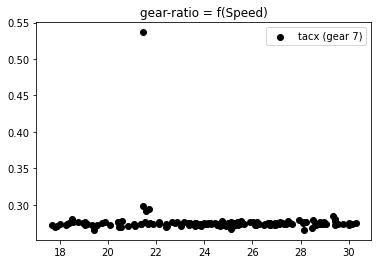

IntervalIndex([(0.2654943818248933, 0.2757457912717846], (0.2757457912717846, 0.2759457912717846], (0.2759457912717846, 0.5368159156279964]],
              closed='right',
              dtype='interval[float64]')
1      (0.2759457912717846, 0.5368159156279964]
2      (0.2759457912717846, 0.5368159156279964]
3      (0.2654943818248933, 0.2757457912717846]
4      (0.2654943818248933, 0.2757457912717846]
5      (0.2654943818248933, 0.2757457912717846]
                         ...                   
183    (0.2654943818248933, 0.2757457912717846]
184    (0.2654943818248933, 0.2757457912717846]
185    (0.2654943818248933, 0.2757457912717846]
186    (0.2654943818248933, 0.2757457912717846]
187    (0.2759457912717846, 0.5368159156279964]
Name: gear-ratio, Length: 187, dtype: category
Categories (3, interval[float64]): [(0.2654943818248933, 0.2757457912717846] < (0.2757457912717846, 0.2759457912717846] < (0.2759457912717846, 0.5368159156279964]]
       DistanceMeters     Cadence  Ext.Watts  Ex

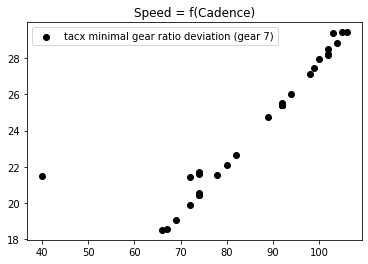

In [92]:
from pandas import DataFrame, Series
import matplotlib.pyplot as plt

from src.visu import plot2d
from src.test_data import COLUMN_NAME_GEAR_RATIO

df_gear7 = dts_tacx_gear7.get_dataframe()
gear_ratio_: Series = df_gear7[COLUMN_NAME_GEAR_RATIO]

plot2d(df_gear7[COLUMN_NAME_SPEED], gear_ratio_, legend_label='tacx (gear 7)')
plt.show()

# bin gear-ration categories: bin ration find ratio where most of the data points are in
c_intervals: pd.IntervalIndex = pd.IntervalIndex.from_breaks([gear_ratio_.min(), gear_ratio_.mean() - 0.03, gear_ratio_.mean() + 0.03,gear_ratio_.max()])

print (c_intervals)

bins: Series = pd.cut(gear_ratio_, bins=c_intervals)

print(bins)
#print(bins.cat.categories)

# get rows of caegory (gear_ratio_.mean() - 0.02, gear_ratio_.mean() + 0.02]
df_gear_ratio_const = df_gear7[bins == c_intervals[2]]
print(df_gear_ratio_const.describe())
plot2d(df_gear_ratio_const[COLUMN_NAME_CADENCE], df_gear_ratio_const[COLUMN_NAME_SPEED], legend_label="tacx minimal gear ratio deviation (gear 7)")

## Scaling

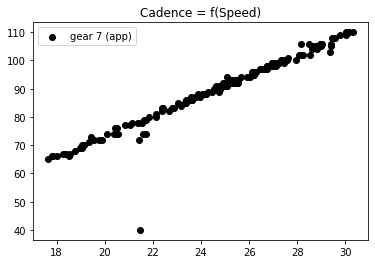

TypeError: 'Series' object is not callable

In [93]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from src.visu import plot2d

def scale(*args: pd.Series):
    return (MinMaxScaler().fit_transform(X) for X in args)

X, y = dts_gear7.cadence_to_speed()
# X_scaled, y_scaled = scale(X, y)
plot2d(y, X.iloc[:, 0], point_color='black', legend_label='gear 7 (app)')
plt.show()

X, y = dts_tacx_gear7.speed_to_power()
# X_scaled, y_scaled = scale(X, y)
plot2d(X.iloc[:, 0], y , point_color='black', legend_label='gear 7 (tacx)')
plt.show()

## Train linear model



## Linear regression
To find out we create a linear model from the tacx data with different features and calculate a score for each tacx cadence value to see whether the model predicts the velocity good enough.

### Cadence
_X_ = [cadence], _y_ = power

In [ ]:
import matplotlib.pyplot as plt
from src.visu import plot2d


X, y = dts_gear7.cadence_to_speed()
plot2d(y, X.iloc[:,0], legend_label='gear 7 (app)')
X, y = dts_gear20.cadence_to_speed()
plot2d(y, X.iloc[:,0], point_color='green', legend_label='gear 20 (app)')

X, y = dts_tacx_gear7.cadence_to_speed()
plot2d(y, X.iloc[:,0], point_color='red', legend_label='gear 7 (tacx)')
plt.show()


# Find X(cad/speed) in tacx in cluster of X(cad/speed) in app data

In [ ]:
import matplotlib.pyplot as plt

X, y = dts_gear7.cadence_to_externalspeed()
plot2d(X.iloc[:, 0], y, point_color='black', legend_label='gear 7 (app)')
X, y = dts_tacx_gear7.cadence_to_externalspeed()
plot2d(X.iloc[:, 0], y, point_color='red', legend_label='gear 7 (tacx)')
plt.show()


